In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [13]:
conda install -c conda-forge textblob

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Shubham\anaconda3

  added / updated specs:
    - textblob


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_0         3.1 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    textblob-0.15.3            |             py_0         595 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38
  textblob           conda-forge/noarch::textblob-0.15.3-py_0

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py38_0 --> conda-forge::conda-4.10.3-py38haa244fe_0




python_abi-3.



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [14]:
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [16]:
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


In [19]:
E_T = pd.read_csv("Elon_musk.csv")

In [21]:
E_T.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [24]:
len(E_T.index)

1999

In [26]:
E_T["Tweets"] = E_T["Text"] 

In [28]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (E_T.Tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)


words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')


In [32]:
words_data

,Frequency
Word,
’,237
&amp;,216
…,140
@erdayastronaut,140
@spacex,138
...,...
progress,7
neuralink,7
close,7


In [34]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Text(0, 0.5, 'Count')

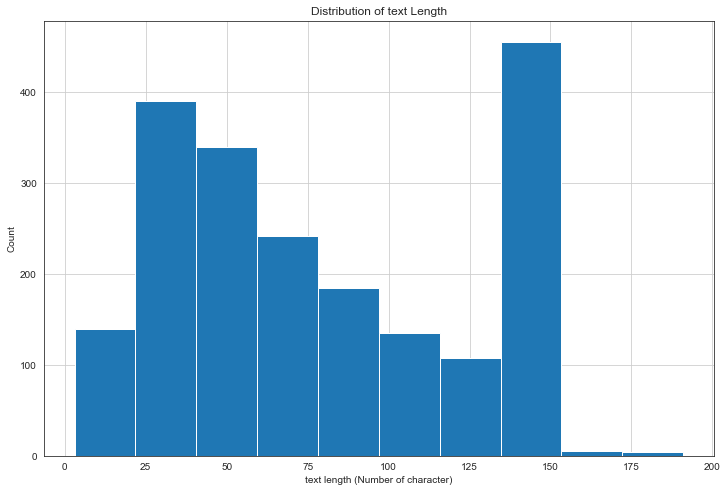

In [39]:
text_length = E_T["Tweets"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

In [41]:
E_T["Tweets"]= E_T["Tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [44]:
import string
E_T["Tweets"]=E_T["Tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [46]:
E_T["Tweets"]=E_T["Tweets"].str.replace('[0-9]','')

In [49]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
stop_words=stopwords.words('english')

In [53]:
E_T["Tweets"]=E_T["Tweets"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [55]:
import re 
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(Tweets):
    Tweets = Tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)
    
    return Tweets

clean = lambda x: clean_Tweets(x)

In [57]:
E_T

,Unnamed: 0,Text,Tweets
0,1,@kunalb11 I’m an alien,kunalb i’m alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...
...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true sounds surreal negative propagand...
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure read ur terms amp condition...
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb dumber ufuf


In [59]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
from textblob import Word
E_T["Tweets"]= E_T["Tweets"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [62]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
E_T["Tweets"]= E_T["Tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [63]:
Tweets_set=E_T["Tweets"]

In [64]:
import re
import sys

def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [65]:
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [66]:
from sklearn.feature_extraction.text import CountVectorizer


In [69]:
vec = CountVectorizer()
X = vec.fit_transform(E_T["Tweets"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)



      aber  able  abo  aboard  abort  absence  absolute  absolutely  absorb  \
0        0     0    0       0      0        0         0           0       0   
1        0     0    0       0      0        0         0           0       0   
2        0     0    0       0      0        0         0           0       0   
3        0     0    0       0      0        0         0           0       0   
4        0     0    0       0      0        0         0           0       0   
...    ...   ...  ...     ...    ...      ...       ...         ...     ...   
1994     0     0    0       0      0        0         0           0       0   
1995     0     0    0       0      0        0         0           0       0   
1996     0     0    0       0      0        0         0           0       0   
1997     0     0    0       0      0        0         0           0       0   
1998     0     0    0       0      0        0         0           0       0   

      absorption  ...  zikryzamir  zip  zogfotpik  

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(E_T["Tweets"])
print(TFIDF)

  (0, 113)	0.6623688405640785
  (0, 2687)	0.7491778954626188
  (1, 4547)	0.3503086432516702
  (1, 3152)	0.39490911009737484
  (1, 1652)	0.4162521748644735
  (1, 890)	0.35842289988597426
  (1, 4524)	0.4162521748644735
  (1, 3622)	0.4162521748644735
  (1, 2420)	0.2703073340188711
  (2, 2537)	0.5043290017718325
  (2, 1583)	0.3080284702583498
  (2, 4133)	0.5704255952716918
  (2, 2609)	0.5704255952716918
  (3, 4650)	0.6108339384056402
  (3, 1050)	0.5037497388423235
  (3, 1602)	0.6108339384056402
  (4, 1244)	0.2876711653018475
  (4, 3151)	0.27277696499630993
  (4, 4936)	0.24937628204523501
  (4, 2708)	0.32114907525749786
  (4, 1272)	0.4094092137495757
  (4, 141)	0.3260835812455286
  (4, 652)	0.3525306208428504
  (4, 4360)	0.1828625922881543
  (4, 775)	0.3260835812455286
  :	:
  (1994, 147)	0.13917721113851475
  (1994, 4555)	0.2117618765707303
  (1994, 1395)	0.16274369098951297
  (1995, 21)	0.4008409077440879
  (1995, 688)	0.4008409077440879
  (1995, 4355)	0.36570555829866774
  (1995, 764)	0.

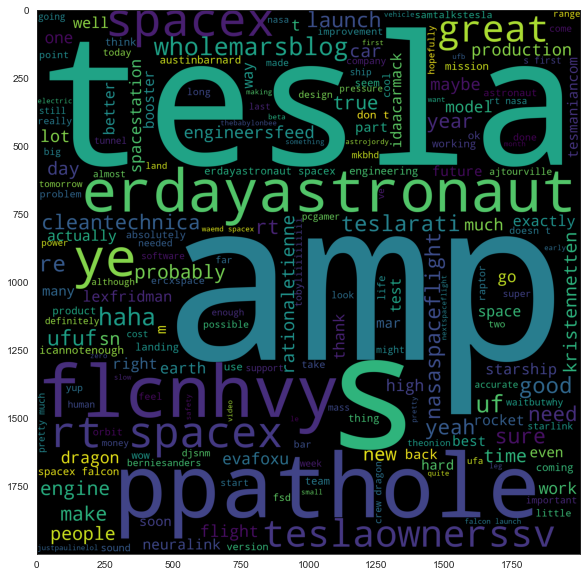

In [75]:
Review_wordcloud = ' '.join(E_T["Tweets"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [77]:
freq = pd.Series(' '.join(E_T["Tweets"]).split()).value_counts()[0:20]
freq

spacex             237
amp                216
tesla              169
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 85
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
launch              55
it’s                54
uf                  53
good                52
year                48
sure                43
dtype: int64

In [79]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
from textblob import TextBlob
E_T['polarity'] = E_T["Tweets"].apply(lambda x: TextBlob(x).sentiment[0])
E_T[['Tweets','polarity']].head(10)

,Tweets,polarity
0,kunalb i’m alien,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000
2,joerogan spotify great interview,0.800000
3,gtera doge underestimated,0.000000
4,teslacn congratulation tesla china amazing exe...,0.200000
5,happy new year ox httpstcowfkmyuoj,0.468182
6,frodo underdoge thought would fail httpstcozgx...,-0.500000
7,owensparks flcnhvy anonyx haha thanks,0.200000
8,flcnhvy anonyx indeed tweet definitely represe...,0.000000
9,entertaining outcome likely,0.250000


In [86]:
E_T[E_T.polarity>0].head(5)

,Unnamed: 0,Text,Tweets,polarity
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,0.200000
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year ox httpstcowfkmyuoj,0.468182
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks,0.200000
9,10,The most entertaining outcome is the most likely,entertaining outcome likely,0.250000


In [89]:
tweets = E_T.drop(['Text'], axis = 1)
tweets

,Unnamed: 0,Tweets,polarity
0,1,kunalb i’m alien,-0.250000
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000
2,3,joerogan spotify great interview,0.800000
3,4,gtera doge underestimated,0.000000
4,5,teslacn congratulation tesla china amazing exe...,0.200000
...,...,...,...
1994,1995,flcnhvy true sound surreal negative propaganda...,0.152381
1995,1996,ppathole make sure read ur term amp condition ...,0.500000
1996,1997,teslagong ppathole samwise gamgee,0.000000
1997,1998,ppathole altho dumb dumber ufuf,-0.375000


In [91]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [93]:
sent_type(tweets['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral

In [95]:
tweets["category"]=tweets['polarity']

tweets.loc[tweets.category > 0,'category']="Positive"
tweets.loc[tweets.category !='Positive','category']="Negative"

tweets["category"]=tweets["category"].astype('category')
tweets.dtypes

Unnamed: 0       int64
Tweets          object
polarity       float64
category      category
dtype: object

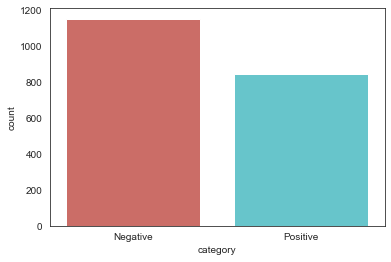

In [97]:
sns.countplot(x='category',data=tweets,palette='hls')

In [99]:
tweets.category.value_counts(normalize=True).mul(100)

Negative    57.628814
Positive    42.371186
Name: category, dtype: float64

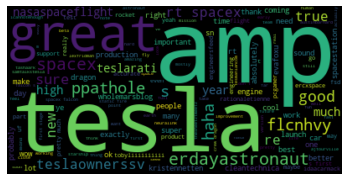

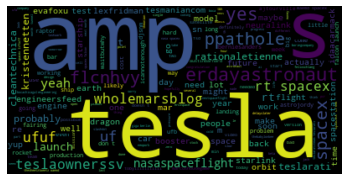

In [100]:
positive_reviews= tweets[tweets.category=='Positive']
negative_reviews= tweets[tweets.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Tweets.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Tweets.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()